In [1]:
import numpy as np
import torch
import random
from protonet import ProtoNet
import torch.nn.functional as F
from batch_loader import BatchLoader, visualize_batch
from trainer import ProtoNetTrainer

You can download dataset [here](https://docs.google.com/uc?export=download&id=1CgJhLEqTLalfQYz_L-HKMSC_akRBPYFs)

In [2]:
# !sh download.sh

In [3]:
# !unzip BIRDS-450-FS.zip -d BIRDS-450-FS

In [4]:
# args
num_way: int = 5
num_spt: int = 4
num_qry: int = 1
lr: float = 0.002
device = "cuda" if torch.cuda.is_available() else "cpu"
seed = 42

In [5]:
torch.random.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)

In [6]:
batch_sampler = BatchLoader(num_way=4,
                            num_spt=2,
                            num_qry=1,
                            device=device,
                            data_path="./BIRDS-450-FS")


In [7]:
batch_sampler.sample()[1][0]

'BOBOLINK'

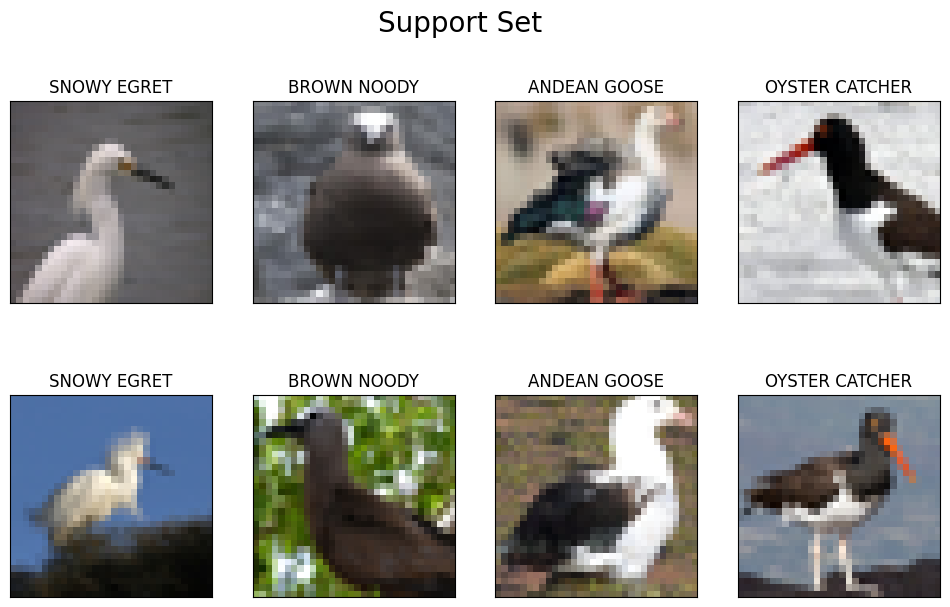

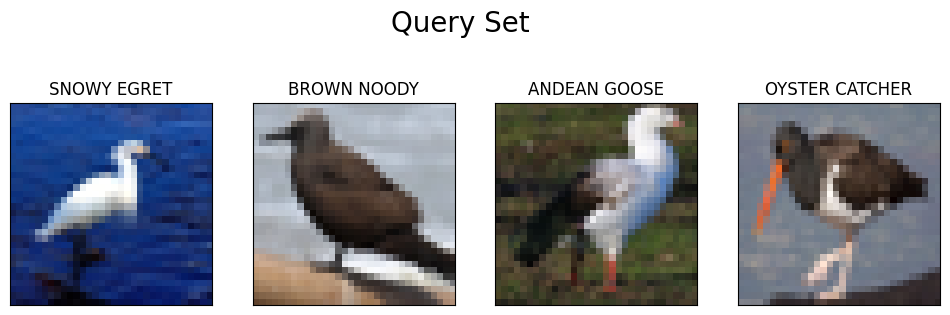

In [8]:
visualize_batch(*batch_sampler.sample())

In [9]:
encoder = ProtoNet(x_dim=3).to(device=device)
optimizer = torch.optim.SGD(params=encoder.parameters(), lr=lr)
trainer = ProtoNetTrainer(batch_sampler, encoder, optimizer)

In [10]:
trainer.train(2000)

current loss: 7.115877765213518
current loss: 1.8237209905148484
current loss: 0.9346917322464288
current loss: 0.6929930843575858
current loss: 0.6721113586612045
current loss: 0.7168113881349564
current loss: 0.57120220315177
current loss: 0.6519464190863072
current loss: 0.5928067544102669
current loss: 0.4745831782696769
current loss: 0.47327013392932715
current loss: 0.5391540504992008
current loss: 0.5762373684067279
current loss: 0.46734161203727126
current loss: 0.49533118955325334
current loss: 0.4777676688320935
current loss: 0.417397438515909
current loss: 0.41588273728499187
current loss: 0.44287247949745506
current loss: 0.46944881189148874


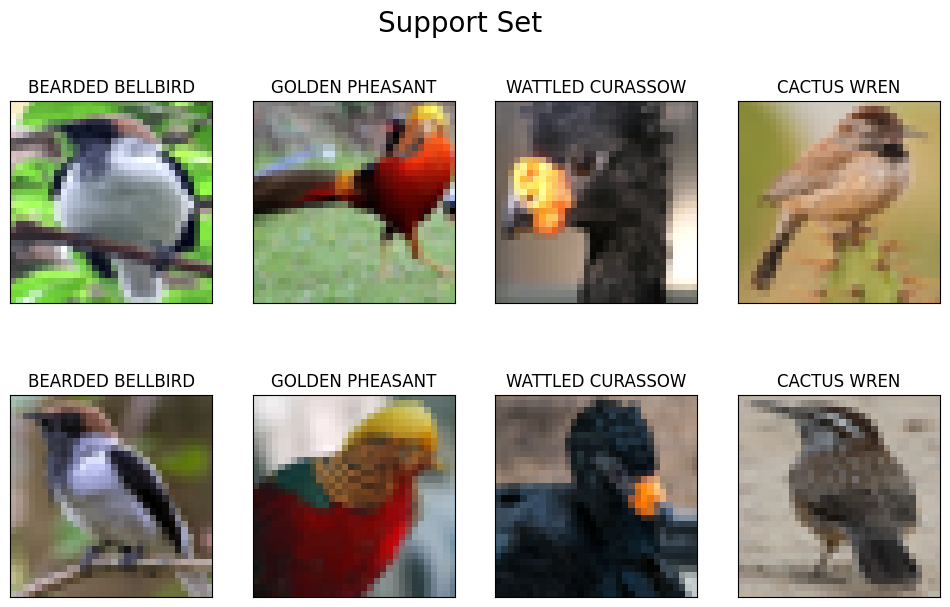

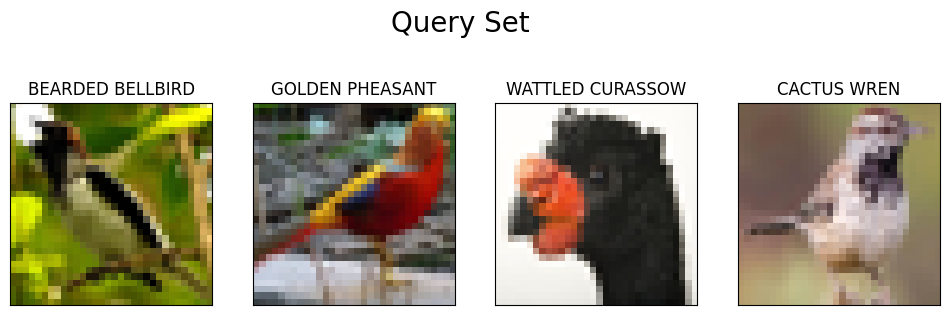

In [11]:
with torch.no_grad():
    encoder.eval()
    batch, id2cls = batch_sampler.sample()
    visualize_batch(batch, id2cls)
    _, logits = trainer.get_loss(batch)

In [12]:
odds = (F.softmax(logits, dim=-1))
for i, odd in enumerate(odds.tolist()):
    print(f"{id2cls[i]}:\n", 
          [f'{o*100:.1f}%' for o in odd], 
          "\n")
        


BEARDED BELLBIRD:
 ['55.3%', '0.4%', '4.0%', '40.2%'] 

GOLDEN PHEASANT:
 ['0.2%', '79.0%', '7.9%', '12.9%'] 

WATTLED CURASSOW:
 ['0.0%', '6.0%', '90.7%', '3.3%'] 

CACTUS WREN:
 ['2.2%', '0.1%', '0.1%', '97.6%'] 

